In [10]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

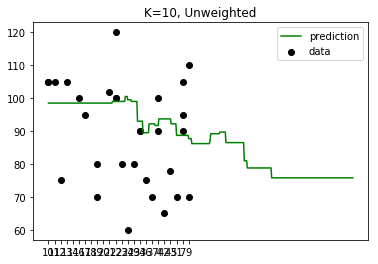

In [2]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

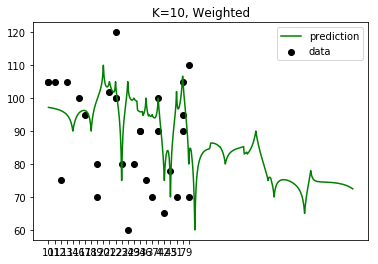

In [3]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

Notice how it seems like the weighted model grossly overfits to points. It is interesting that it oscillates around the datapoints. This is because the decay in weight happens so quickly.


## Validating KNN

Now validating KNN, whether a regression or a classifier, is pretty much exactly the same as evaluating other classifiers or regression. Cross validation is still tremendously valuable. You can do holdouts. You even still get an $R^2$ value for the regression.

Why don't we validate that overfitting of the previous model with some k-fold cross validation? The test statistic given by this model is $R^2$, which measures the same as in linear regression.

In [4]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

Why don't you add the other feature and mess around with $k$ and weighting to see if you can do any better than we've done so far?

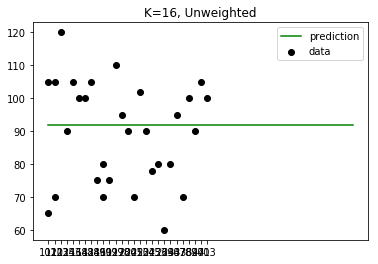

Unweighted Accuracy: -0.35 (+/- 0.51)

With 20% Holdout: -0.10999644886363646
Testing on Sample: 0.09331774342792053


In [53]:
## Your model here.

from sklearn import neighbors

# Build our model.
knn2 = neighbors.KNeighborsRegressor(n_neighbors=16)
X2 = pd.DataFrame(music.duration)
Y2 = music.bpm
knn2.fit(X2, Y2)

# Set up our prediction line.
T2 = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y2_ = knn2.predict(T2)

plt.scatter(X2, Y2, c='k', label='data')
plt.plot(T2, Y2_, c='g', label='prediction')
plt.legend()
plt.title('K=16, Unweighted')
plt.show()

score = cross_val_score(knn2, X2, Y2, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

from sklearn.model_selection import train_test_split
# w/ holdout groups
target2 = music['bpm']
data2 = music[['duration','loudness']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, target2, test_size=0.2, random_state=20)

print('\nWith 20% Holdout: ' + str(knn2.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(knn2.fit(data2, target2).score(data2, target2)))

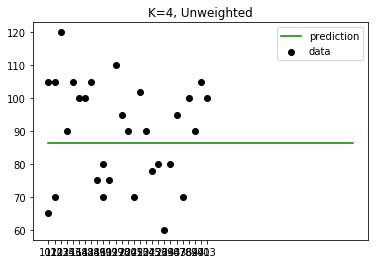

Unweighted Accuracy: -0.76 (+/- 0.70)
With 20% Holdout: -0.9225284090909092
Testing on Sample: 0.3650143541805067


In [51]:
# Build our model.
knn3 = neighbors.KNeighborsRegressor(n_neighbors=4)
X2 = pd.DataFrame(music.duration)
Y2 = music.bpm
knn3.fit(X2, Y2)

# Set up our prediction line.
T2 = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y2_ = knn3.predict(T2)

plt.scatter(X2, Y2, c='k', label='data')
plt.plot(T2, Y2_, c='g', label='prediction')
plt.legend()
plt.title('K=4, Unweighted')
plt.show()

score = cross_val_score(knn3, X2, Y2, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

# w/ holdout groups

print('\nWith 20% Holdout: ' + str(knn3.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(knn3.fit(data2, target2).score(data2, target2)))

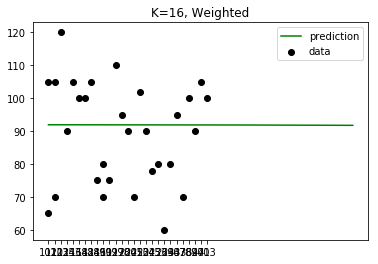

Weighted Accuracy: -0.74 (+/- 0.76)

With 20% Holdout: -0.2380738954283719
Testing on Sample: 0.9928822245420897


In [54]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=16, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=16, Weighted')
plt.show()

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

print('\nWith 20% Holdout: ' + str(knn_w.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(knn_w.fit(data2, target2).score(data2, target2)))

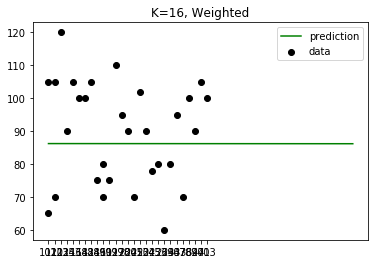

Weighted Accuracy: -0.94 (+/- 0.86)

With 20% Holdout: -0.9542617363670797
Testing on Sample: 0.9928822245420897


In [55]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X = pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=16, Weighted')
plt.show()

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

print('\nWith 20% Holdout: ' + str(knn_w.fit(X_train2, y_train2).score(X_test2, y_test2)))
print('Testing on Sample: ' + str(knn_w.fit(data2, target2).score(data2, target2)))